- 특정 알고리즘에 의해 데이터들을 연결하여 계층적으로 클러스터를 구성해 나가는 방법
#### 응집형 계층적 클러스트링
- 단순연결(single linkage,Nearest Neighbor)
– 2개의 클러스터에서 각 클러스터에 속하는 멤버 사이의 거리가 가장 가까운 거리를 모두 계산하고, 이
값들중 가장 작은 값들을 가지는 2개의 클러스터를 병합하여 상위 단계 클러스터를 구성한다. - 거리계산시 가까운 거리 계산

- 완전연결(complete linkage, Furthest Neighbor) 
– 2개의 클러스터에서 각 클러스터에 속하는 멤버사이의 거리가 가장 먼 거리를 모두 계산하고 이 값들중
가장 작은 값을 가지는 2개의 클러스터를 병합하여 상위 단계 클러스터를 구성한다. - 거리계산시 먼거리 계산
- 거리계산은 유클리드 방식
- 클러스터 만들 때는 단순연결, 완전연결 둘 다 가장 짧은 거리 기준으로 묶자

## 실습 예제-1 : 완전연결을 이용한 계층적 클러스트링

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(111)
var = ['X', 'Y'] 
labels = ['점0','점1','점2','점3','점4']
X = np.random.random_sample([5, 2]) * 10 # 5행 2열 구조로 난수를 만듦
df = pd.DataFrame(X, columns=var, index=labels) # index=labels 인덱스는 행 인덱스
print(df)

           X         Y
점0  6.121702  1.690698
점1  4.360590  7.692625
점2  2.953253  1.491630
점3  0.224783  4.202245
점4  2.386821  3.376562


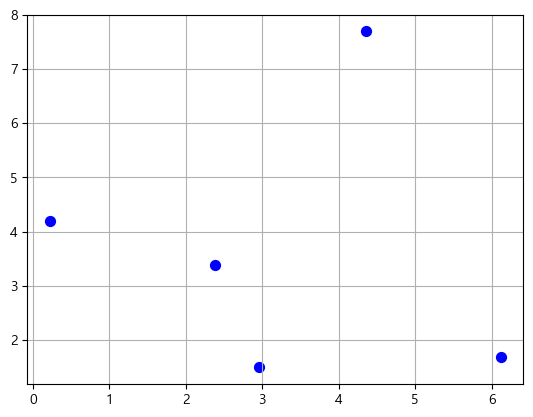

In [3]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=50)
plt.grid(True)
plt.show()


In [9]:
# squareform => 대각선을 0으로 하는 데이터를 생성해줌 (1차원 데이터를 2차원으 구해준다.)
full = squareform(np.arange(1,11))
full

array([[ 0,  1,  2,  3,  4],
       [ 1,  0,  5,  6,  7],
       [ 2,  5,  0,  8,  9],
       [ 3,  6,  8,  0, 10],
       [ 4,  7,  9, 10,  0]])

In [4]:
from scipy.spatial.distance import pdist, squareform
distmatrix = pdist(df, metric='euclidean') # 두 점 사이의 거리 계산
row_dist = pd.DataFrame(squareform(distmatrix), columns=labels, index=labels) 
print(row_dist) # 두점 사이 거리 계산값 출력

          점0        점1        점2        점3        점4
점0  0.000000  6.254970  3.174696  6.409487  4.097740
점1  6.254970  0.000000  6.358690  5.411807  4.745963
점2  3.174696  6.358690  0.000000  3.846035  1.968201
점3  6.409487  5.411807  3.846035  0.000000  2.314338
점4  4.097740  4.745963  1.968201  2.314338  0.000000


In [5]:
from scipy.cluster.hierarchy import linkage # linkage() : 응집형 계층적 클러스터링 수행
row_clusters = linkage(distmatrix, method='complete') # method='complete' => 완전연결방식이다. 
row_clusters 


array([[2.        , 4.        , 1.96820089, 2.        ],
       [3.        , 5.        , 3.84603471, 3.        ],
       [0.        , 1.        , 6.25496953, 2.        ],
       [6.        , 7.        , 6.40948658, 5.        ]])

In [6]:
pd.DataFrame(row_clusters, columns=['클러스터ID_1', '클러스터ID_2', '거리', '클러스터 멤버수'],
index=['클러스터 %d' % (i+1) for i in range(row_clusters.shape[0])])
# 클러스터 아이디 2에 5.0은 클러스터 1을 합친 후 새롭게 생긴 클러스터이다.

,클러스터ID_1,클러스터ID_2,거리,클러스터 멤버수
클러스터 1,2.0,4.0,1.968201,2.0
클러스터 2,3.0,5.0,3.846035,3.0
클러스터 3,0.0,1.0,6.254970,2.0
클러스터 4,6.0,7.0,6.409487,5.0


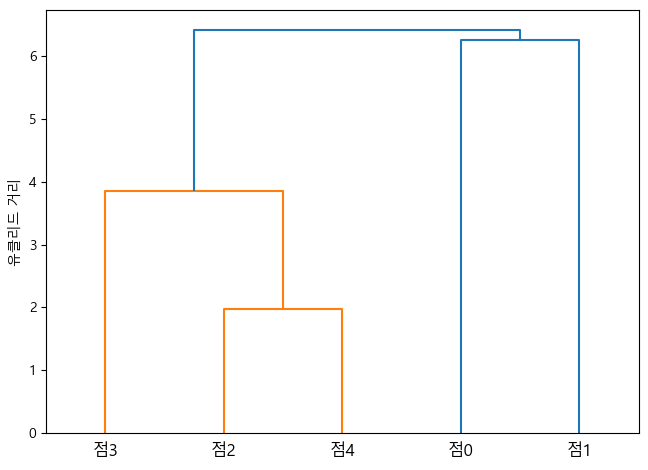

In [7]:
from scipy.cluster.hierarchy import dendrogram # dendrogram() : 클러스터의 계층 구조를 표현 (병합된 순서를 알 수 있다.)
row_dendrogram = dendrogram(row_clusters, labels=labels) 
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.tight_layout()
plt.ylabel('유클리드 거리')
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering # 이 부분 잘 기억하기 
# n_clusters : 최종 클러스터 개수   #  affinity='euclidean' => 거리계산함수,  linkage='complete'=> 연결방식
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete') # AgglomerativeClustering => linkage와 비슷한데 파라메타가 조금 다름// 내가 명시적으로 몇 개를 정해줄 수 있다.
labels = ac.fit_predict(X)
print('클러스터 분류 결과 :', labels)

클러스터 분류 결과 : [0 0 1 1 1]


## 아이리스 데이터를 통해 또 다른 실습(교제에는 없음)

In [10]:
import statsmodels.api as sm

iris = sm.datasets.get_rdataset('iris', package = 'datasets')
iris_df = iris.data
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(iris_df.Species) # 알파벳 순서대로 0,1,2
iris_df.Species = le.transform(iris_df.Species)
iris_df.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

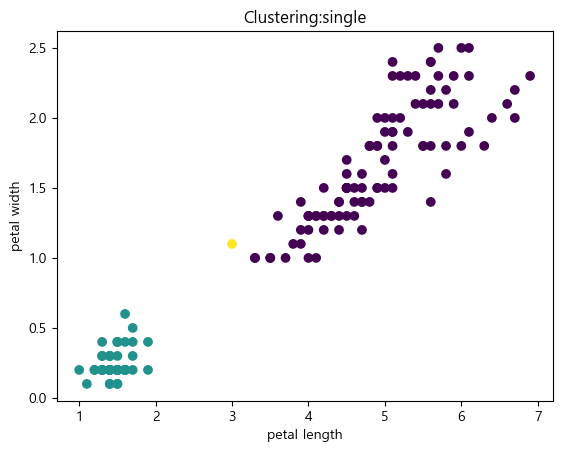

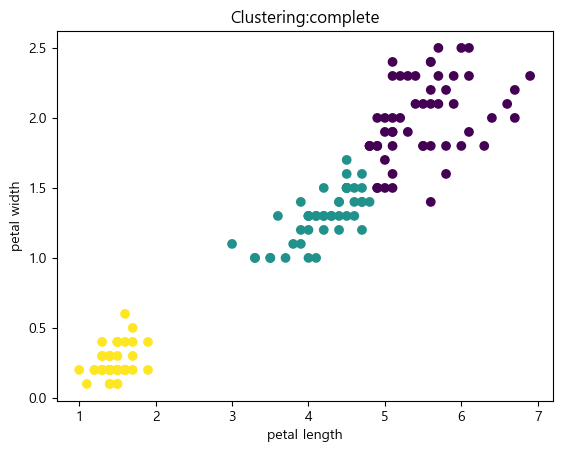

In [13]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

linkage = ['single', 'complete'] # average, ward
for idx, i in enumerate(linkage): 
    plt.figure(idx)
    hier = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = i) # n_clusters = 3 => 아이리스 데이터는 3가지로 되어있으므로
    hier.fit(iris_df.iloc[:,2:4])
    plt.scatter(iris_df.iloc[:,2], iris_df.iloc[:,3], c = hier.labels_) # labels_ => 여기는 클러스터 이름이 들어있을 것이다.
    plt.title("Clustering:" +i)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
plt.show()
# 색 순서는 중요하지 않다.

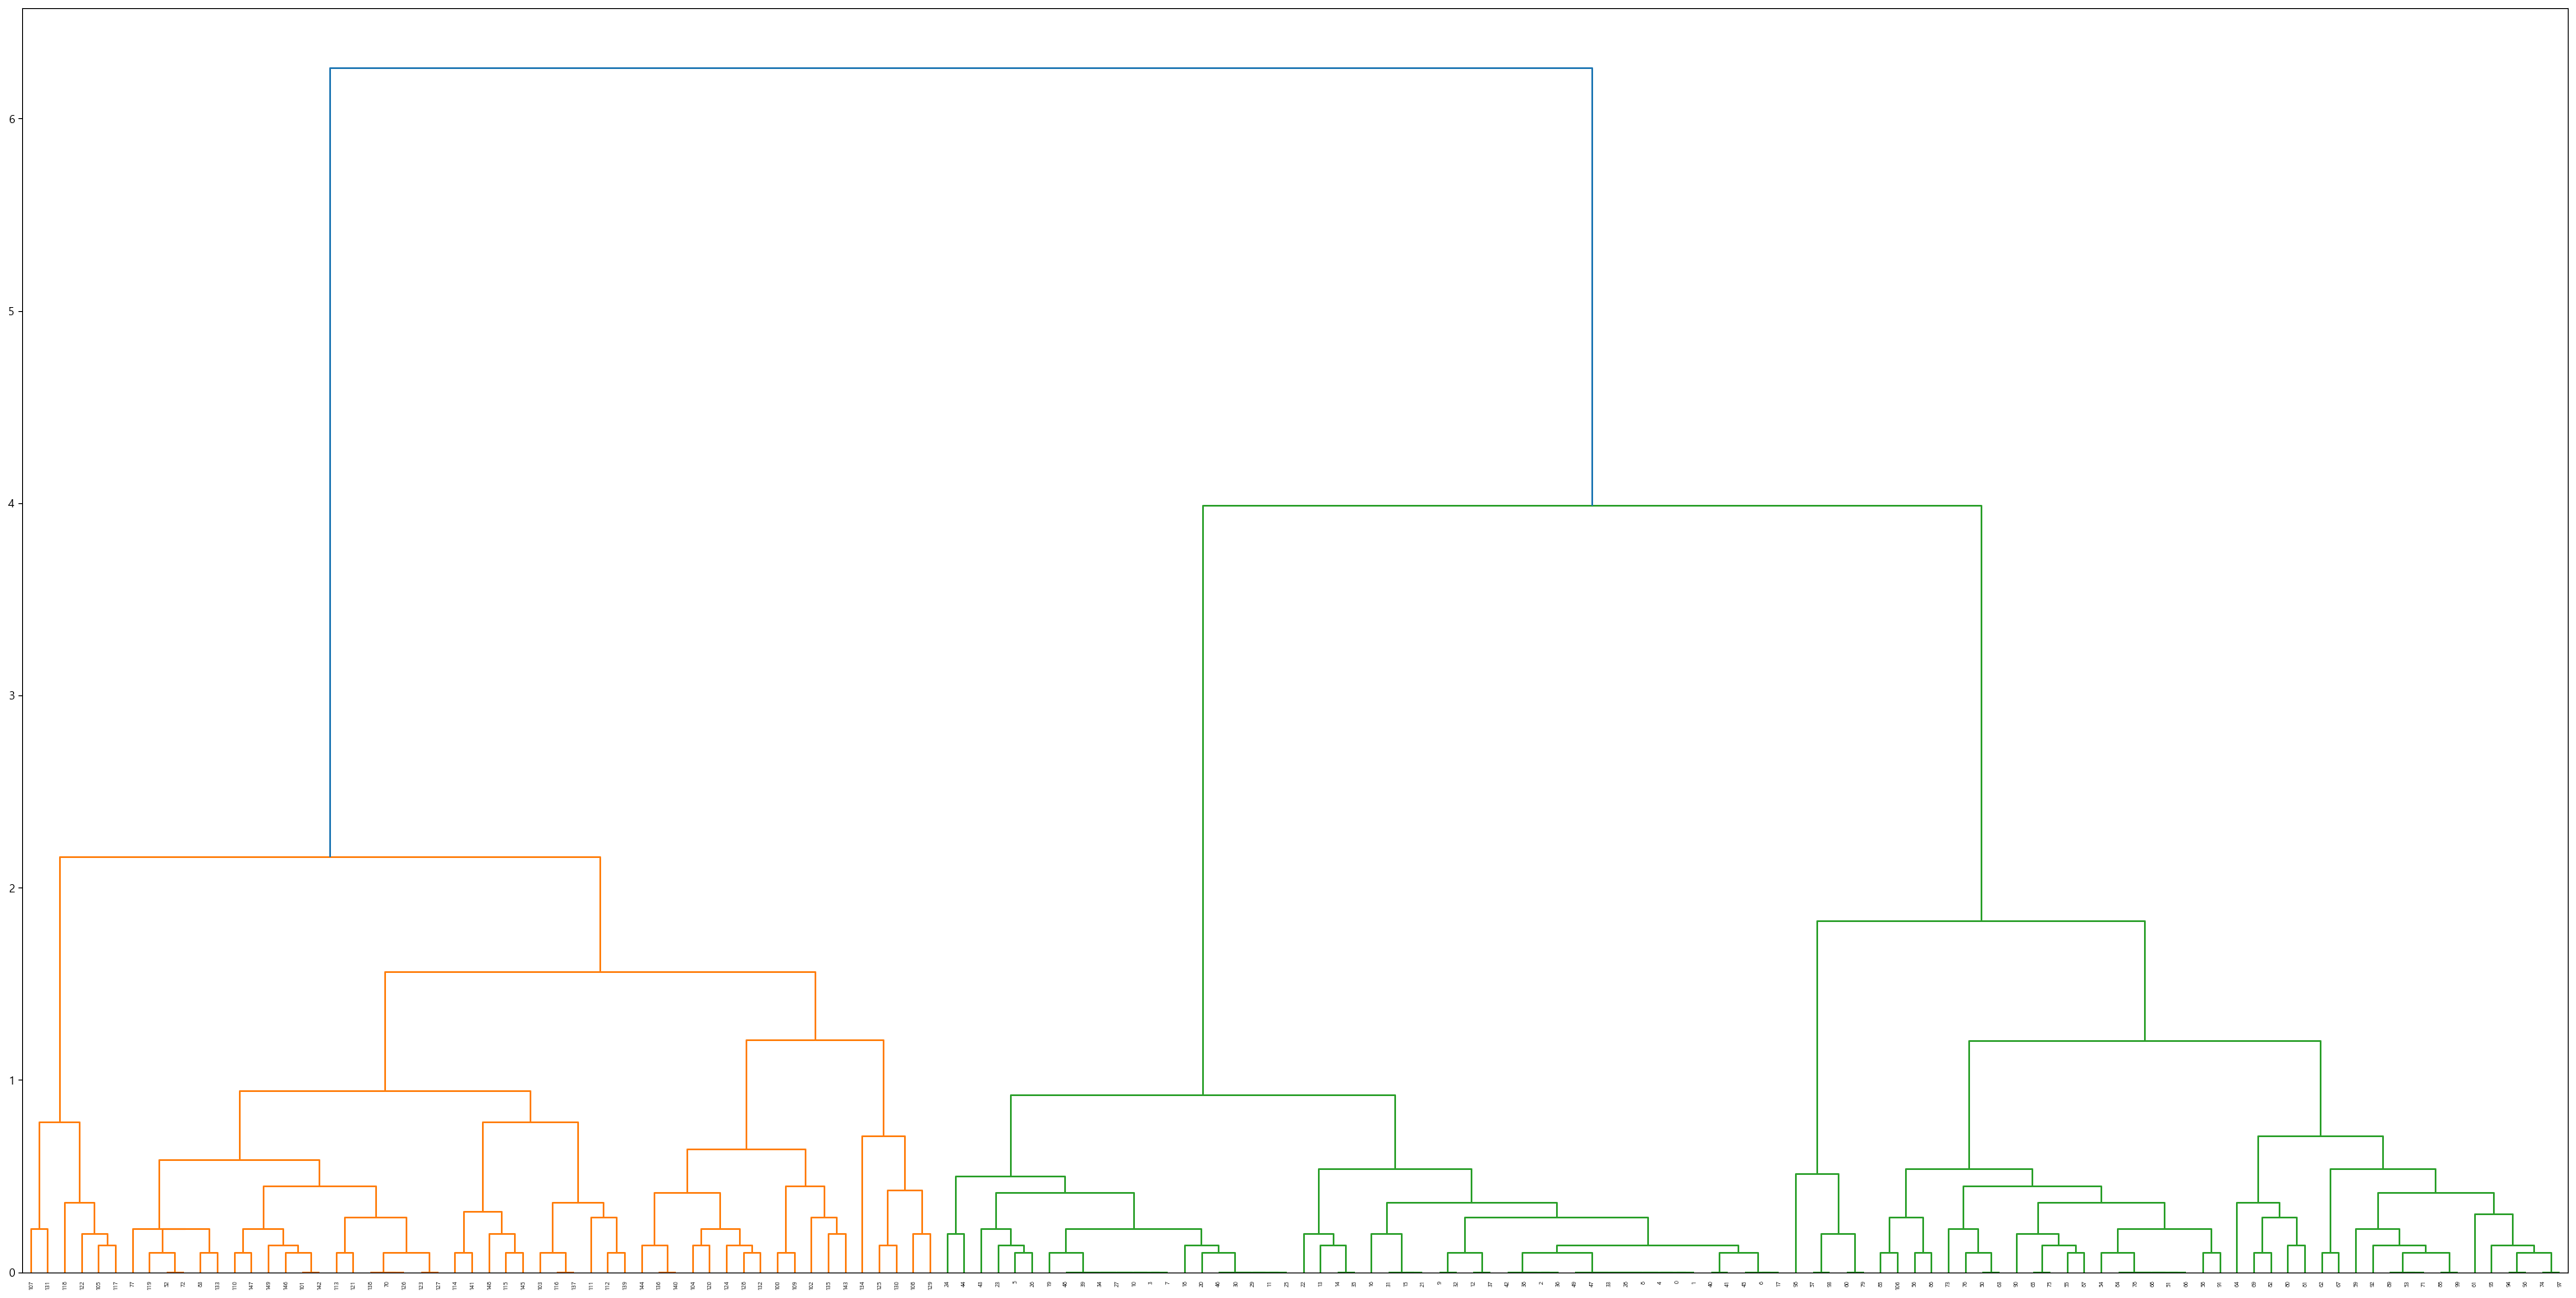

In [14]:
# linkage를 이용하는 방법이다.
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

clustering = linkage(iris_df.iloc[:,2:4], method = 'complete') # iris_df.iloc[:,2:4] 꽃잎 길이와 넓이를 가지고 계산
# y축은 거리가 된다
plt.figure(figsize = (40,20))
dendrogram(clustering)
plt.show()

In [15]:
from scipy.cluster.hierarchy import fcluster

predict = fcluster(clustering, 3, criterion = 'distance') # 3 => y축의 거리 값의 파라메터이다.
predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
# 이 부분은 재미삼아 하는거라고 함  (위의 2,3,1을 보기편하게 0,1,2로 변환)
import numpy as np
 # np.choose((predict-1),[2,0,1]).astype(np.int64) => predict 값이 1이면 0번째 위치 값을 치환해서 사용하라
adjusted_pred = np.choose((predict-1),[2,0,1]).astype(np.int64)
adjusted_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [20]:
pred_name = le.inverse_transform(adjusted_pred)
origin_name = le.inverse_transform(iris_df.Species)
origin_name

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [21]:
ct = pd.crosstab(origin_name, pred_name, rownames = ['True'], colnames = ['Predicted'], margins = True)
print(ct)

Predicted   setosa  versicolor  virginica  All
True                                          
setosa          50           0          0   50
versicolor       0          45          5   50
virginica        0           1         49   50
All             50          46         54  150


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

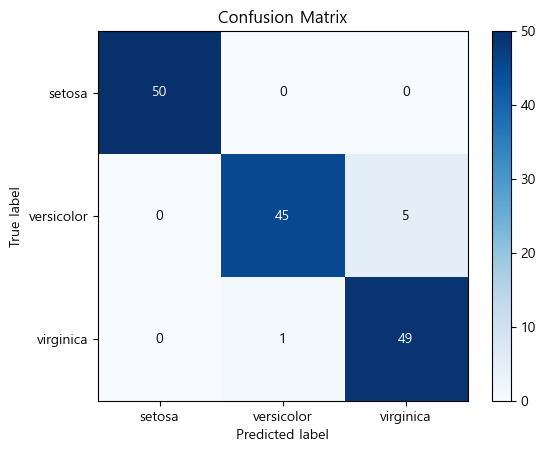

In [22]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(origin_name, pred_name)